In [3]:
import numpy as np
import polars as pl

num_rows = 5000
rng = np.random.default_rng(seed=7)

buildings = {
      "sqft": rng.exponential(scale=1000, size=num_rows),
     "price": rng.exponential(scale=100_000, size=num_rows),
     "year": rng.integers(low=1995, high=2023, size=num_rows),
     "building_type": rng.choice(["A", "B", "C"], size=num_rows),
  }
buildings_lazy = pl.LazyFrame(buildings)
buildings_lazy


In [4]:
lazy_query = (
     buildings_lazy
     .with_columns(
         (pl.col("price") / pl.col("sqft")).alias("price_per_sqft")
     )
    .filter(pl.col("price_per_sqft") > 100)
    .filter(pl.col("year") < 2010)
  )
lazy_query

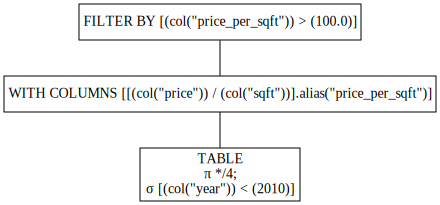

In [7]:
lazy_query.show_graph()

In [8]:
print(lazy_query.explain())

FILTER [(col("price_per_sqft")) > (100.0)] FROM
   WITH_COLUMNS:
   [[(col("price")) / (col("sqft"))].alias("price_per_sqft")] 
    DF ["sqft", "price", "year", "building_type"]; PROJECT */4 COLUMNS; SELECTION: [(col("year")) < (2010)]


In [10]:
lazy_query = (
     buildings_lazy
     .with_columns(
         (pl.col("price") / pl.col("sqft")).alias("price_per_sqft")
     )
     .filter(pl.col("price_per_sqft") > 100)
     .filter(pl.col("year") < 2010)
)

( lazy_query
    .collect()
     .select(pl.col(["price_per_sqft", "year"]))
)

price_per_sqft,year
f64,i64
3268.19045,1996
274.339166,2000
296.979717,2004
378.86472,2002
127.302589,1995
…,…
265.702962,2008
2481.810063,2009
698.203822,2008


In [11]:
( lazy_query
  .collect()
  .select(pl.col(["price_per_sqft", "year"]))
  .describe()
 )

statistic,price_per_sqft,year
str,f64,f64
"""count""",1317.0,1317.0
"""null_count""",0.0,0.0
"""mean""",1400.622815,2002.003037
"""std""",5755.888716,4.324595
"""min""",100.02061,1995.0
"""25%""",166.351274,1998.0
"""50%""",296.71958,2002.0
"""75%""",744.552161,2006.0
"""max""",90314.966163,2009.0
